# Install drillvision

In [15]:
!pip install drillvision


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import appropriate modules

In [1]:
from neural_network_model.bit_vision import BitVision
from pathlib import Path

# Initiate BitVision object and set the directory for dataset

In [3]:
obj = BitVision(
    train_test_val_dir=Path("__file__").parent / "dataset_train_test_val"
)

In [4]:
print(obj.categories)

['pdc_bit', 'rollercone_bit']


In [5]:
print(obj.data_details)

{'test': {'pdc_bit': 2, 'rollercone_bit': 2}, 'train': {'pdc_bit': 7, 'rollercone_bit': 7}, 'val': {'pdc_bit': 1, 'rollercone_bit': 1}}


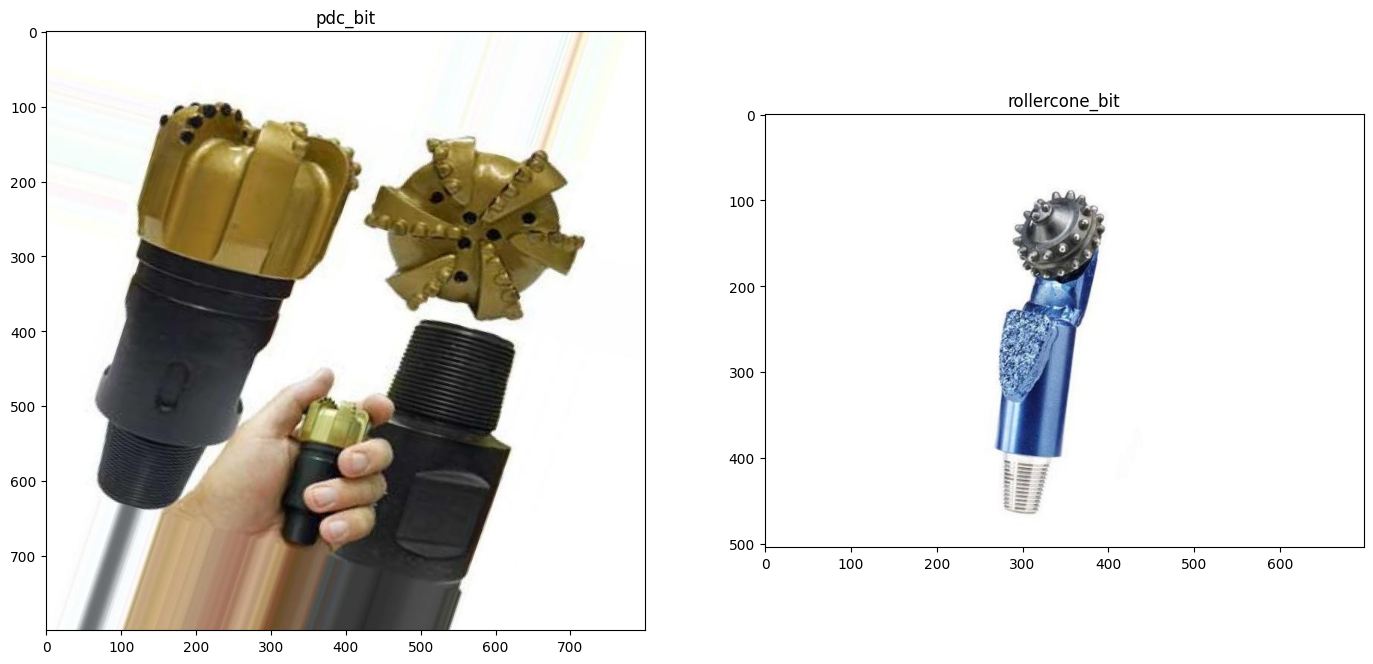

In [7]:
obj.plot_image_category(nrows=1, ncols=2)


In [8]:
obj.assemble_deep_net_model_2()

In [9]:
obj.compile_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 64)      36928     
                                                      

In [10]:
obj.train_model(epochs=10)

Found 14 images belonging to 2 classes.


2023-11-20 10:43:55,086 - INFO - Rescaling train data, {'pdc_bit': 0, 'rollercone_bit': 1}:


Found 2 images belonging to 2 classes.


2023-11-20 10:43:55,093 - INFO - Rescaling val data, {'pdc_bit': 0, 'rollercone_bit': 1}:


2023-11-20 10:43:55,094 - WARNING - `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of batches seen.



Epoch 2: val_accuracy improved from -inf to 0.50000, saving model to C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: val_accuracy did not improve from 0.50000

Epoch 6: val_accuracy did not improve from 0.50000

Epoch 7: val_accuracy did not improve from 0.50000

Epoch 8: val_accuracy did not improve from 0.50000

Epoch 9: val_accuracy did not improve from 0.50000

Epoch 10: val_accuracy improved from 0.50000 to 1.00000, saving model to C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


2023-11-20 10:44:11,230 - INFO - Model saved to C:\Users\atashne\Desktop\DrillBitVision\deep_model


2023-11-19 17:24:07,887 - INFO - dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


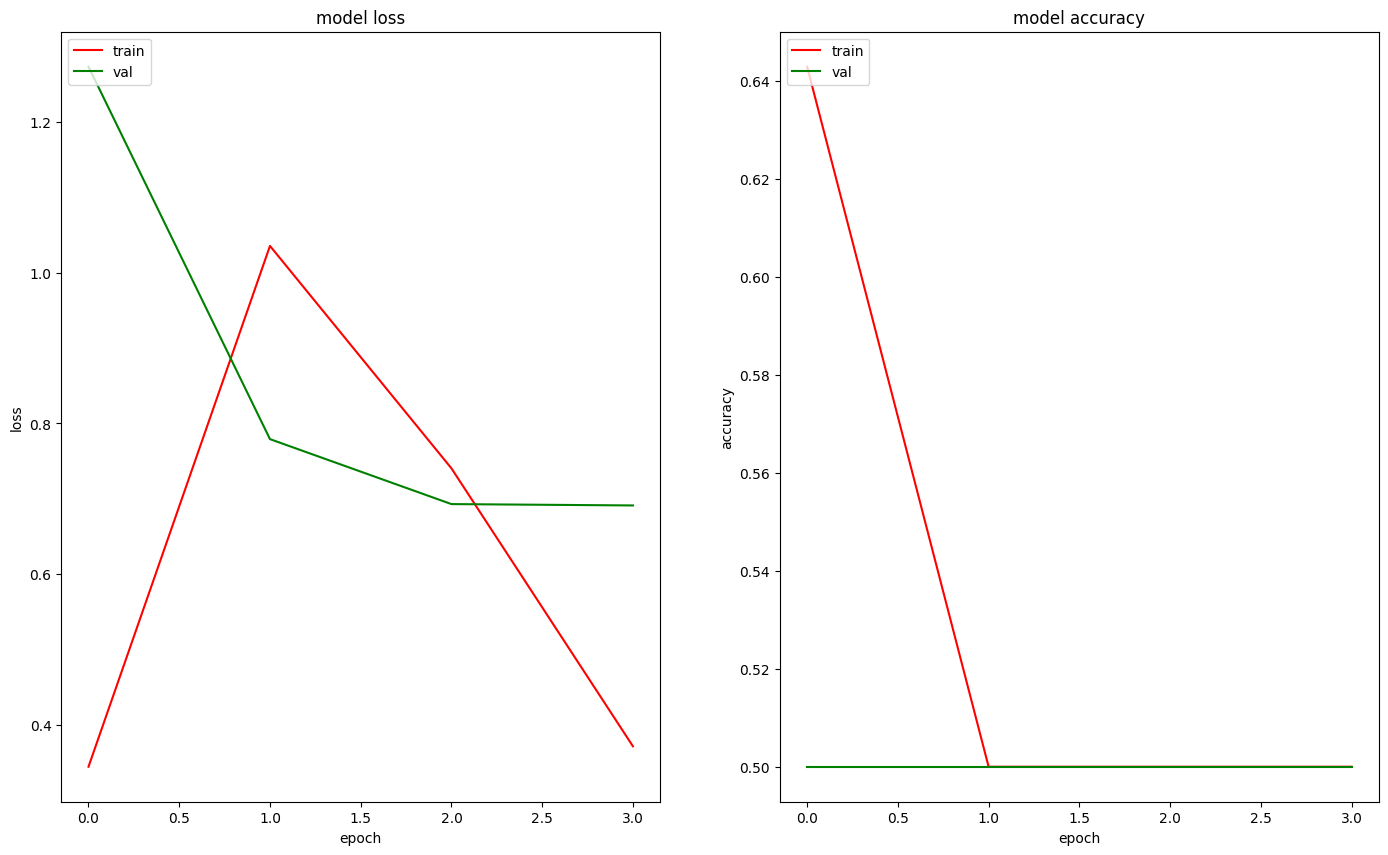

In [25]:
obj.plot_history()


2023-11-20 10:44:29,824 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


1/1 [==============================] - 0s 117ms/step


2023-11-20 10:44:29,995 - INFO - Prediction: rollercone_bit, category: pdc_bit


1/1 [==============================] - 0s 40ms/step


2023-11-20 10:44:30,083 - INFO - Prediction: rollercone_bit, category: pdc_bit


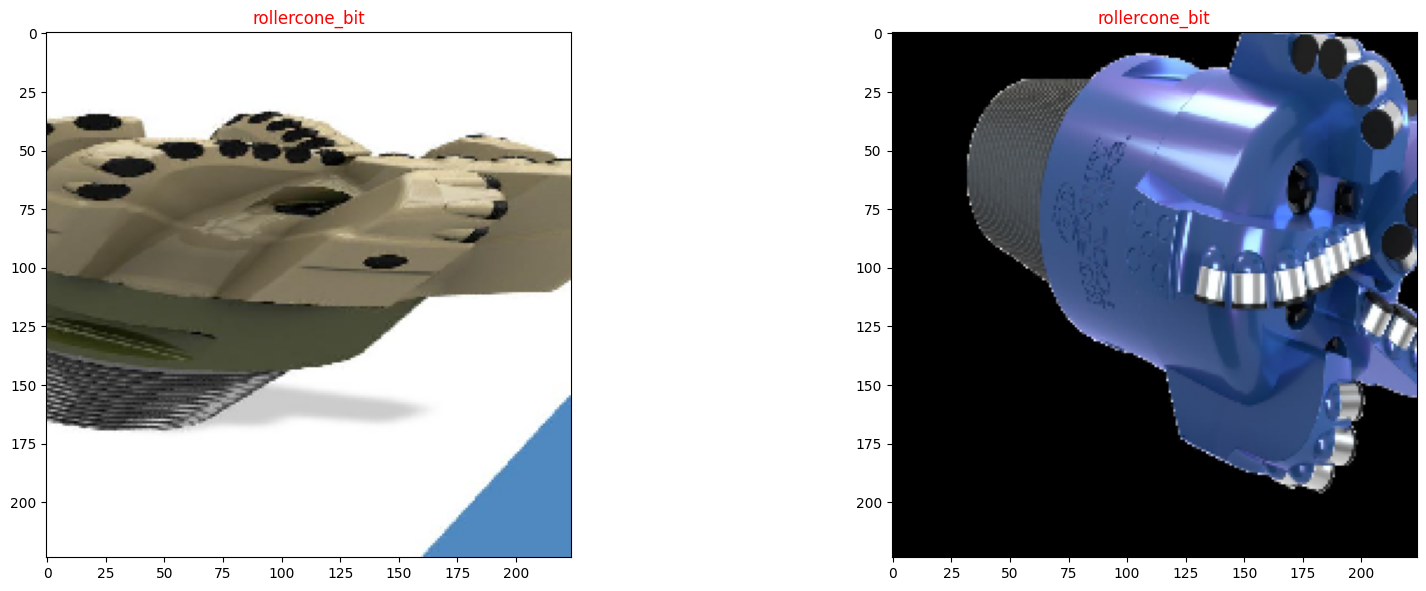

1/1 [==============================] - 0s 34ms/step


2023-11-20 10:44:30,970 - INFO - Prediction: rollercone_bit, category: rollercone_bit


1/1 [==============================] - 0s 31ms/step


2023-11-20 10:44:31,041 - INFO - Prediction: rollercone_bit, category: rollercone_bit


<Figure size 640x480 with 0 Axes>

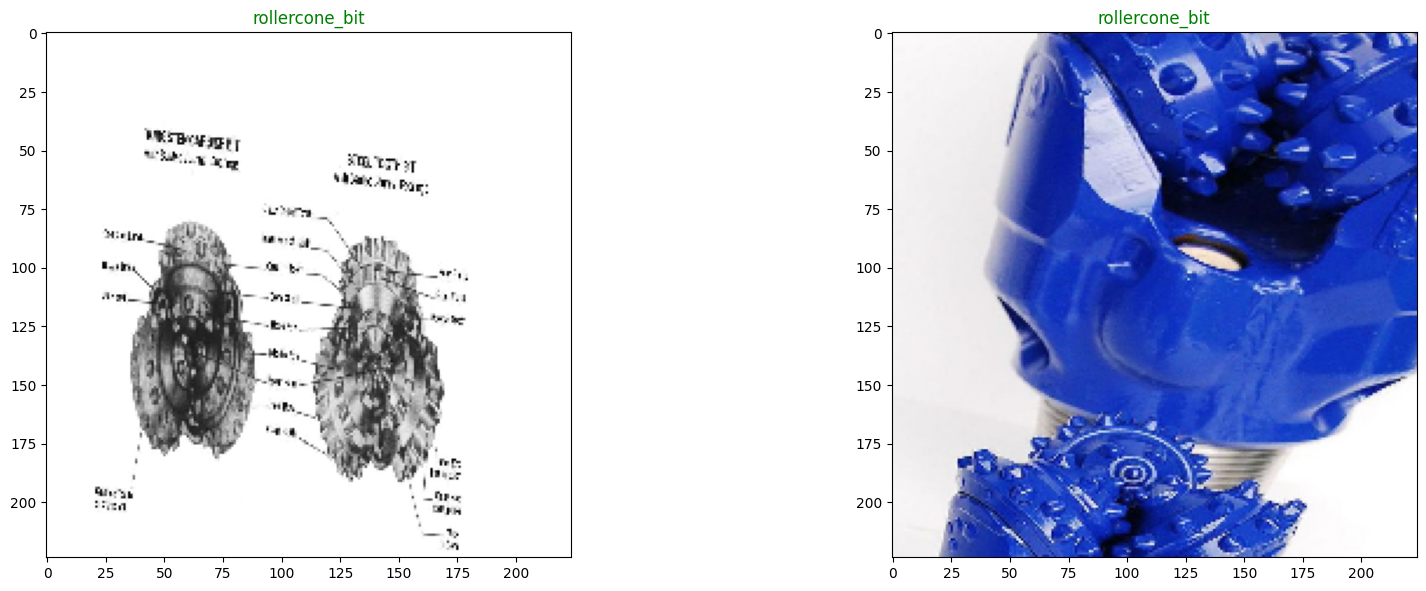

Found 4 images belonging to 2 classes.
1/1 [==============================] - 0s 207ms/step - loss: 20.1519 - accuracy: 0.5000


<Figure size 640x480 with 0 Axes>

In [11]:
obj.predict(num_rows=2, num_cols=2, figsize=(4, 10))

In [12]:
print(obj.layer_names)

{'conv_layer': ['conv2d_6', 'conv2d_7', 'conv2d_8', 'conv2d_9', 'conv2d_10', 'conv2d_11'], 'other_layer': ['max_pooling2d_4', 'dropout_6', 'max_pooling2d_5', 'dropout_7', 'max_pooling2d_6', 'dropout_8', 'flatten_2', 'dense_3', 'dropout_9', 'dense_4']}


# Visualize the convolution layers using grad cam

2023-11-20 10:49:05,937 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


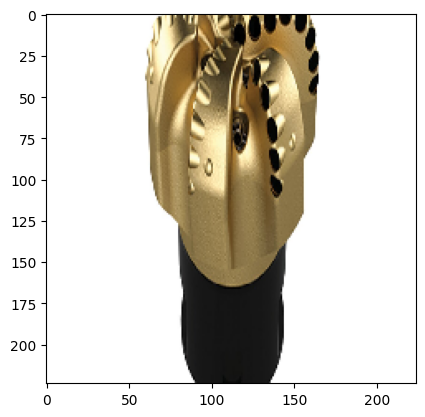

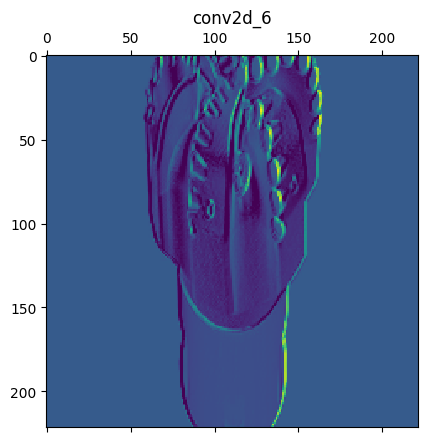

2023-11-20 10:49:07,291 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


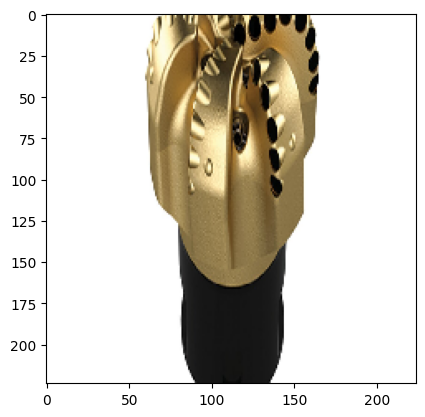

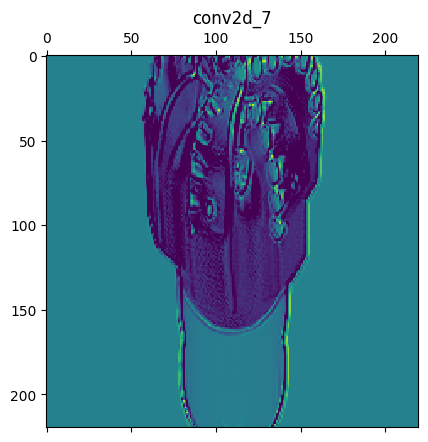

2023-11-20 10:49:08,492 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


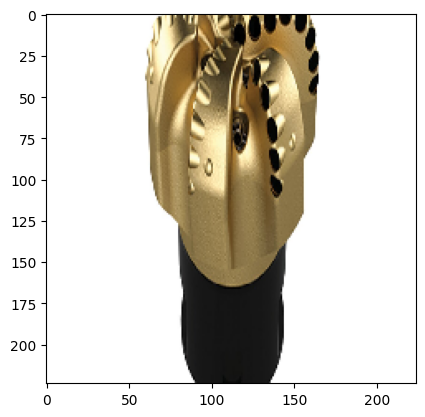

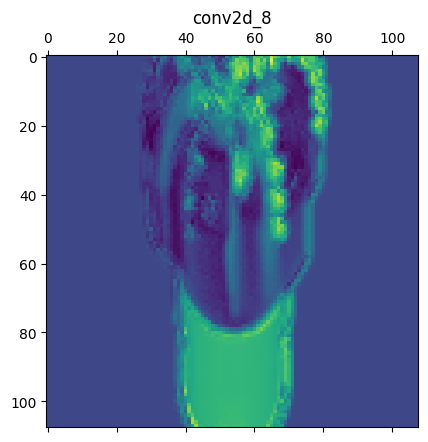

2023-11-20 10:49:09,691 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


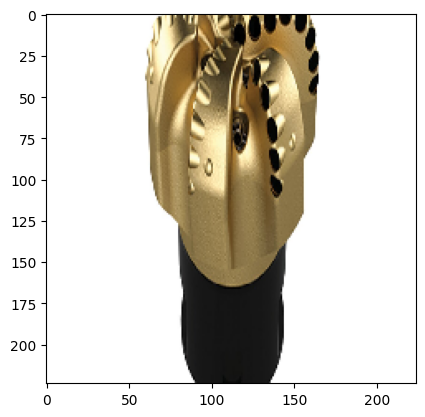

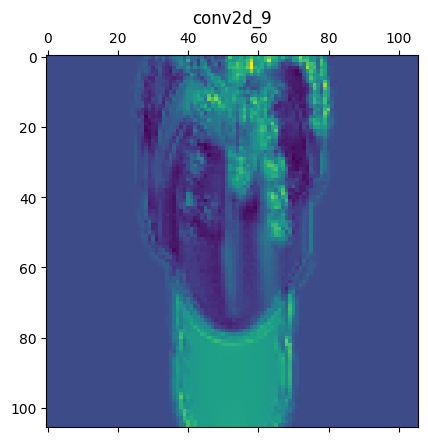

2023-11-20 10:49:10,880 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


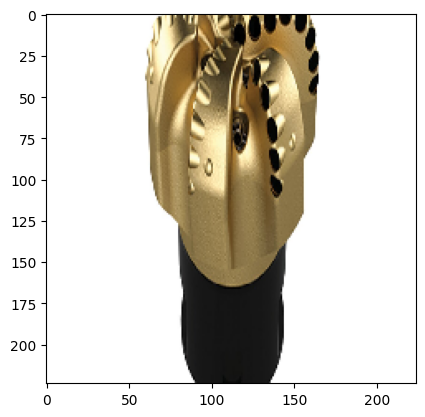

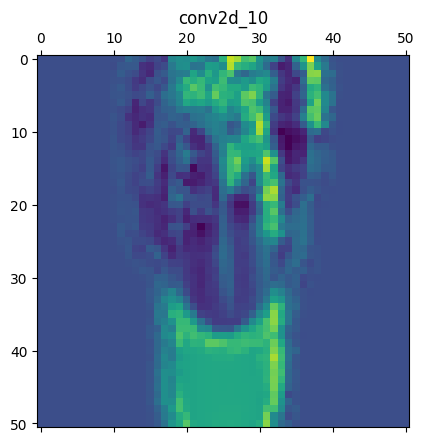

2023-11-20 10:49:12,105 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


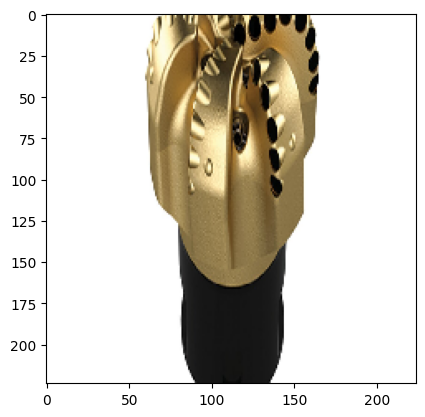

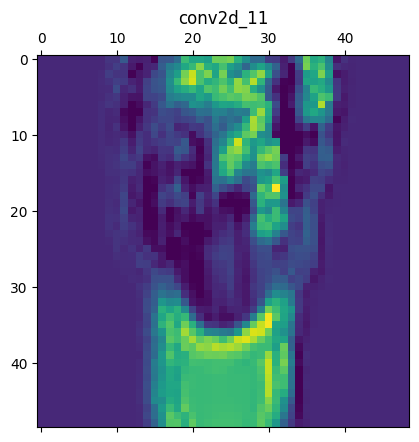

In [15]:
for conv_layer in obj.layer_names["conv_layer"]:
    obj.grad_cam_viz(
        gradcam_fig_name="test.png",
        print_layer_names=False,
        test_folder_dir=Path("__file__").parent
        / "dataset_train_test_val"
        / "train",
        layer_name=conv_layer,
    )